<a href="https://colab.research.google.com/github/ricardoV94/ThinkBayesPymc3/blob/master/ThinkBayes_Chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
pip install arviz

In [0]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as tt
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
with pm.Model() as m_5_3:
    p_blood = [1, 60, 39]
    p_oliver_guilty = pm.Bernoulli('p_oliver_guilty', p=.5)
                        
    hyp1 = pm.Multinomial('hyp1', n=1, p=p_blood, shape=3, observed=np.array([1,0,0]))
    hyp2 = pm.Multinomial('hyp2', n=2, p=p_blood, shape=3, observed=np.array([1,1,0]))

    # Trick for observing different 'datasets' under each hypothesis
    pm.Potential('like', pm.math.switch(p_oliver_guilty, hyp1.logpt, hyp2.logpt))
    trace_m_5_3 = pm.sample(5000)

Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [p_oliver_guilty]
100%|██████████| 5500/5500 [00:00<00:00, 5880.82it/s]


In [4]:
p = trace_m_5_3['p_oliver_guilty'].mean()
p

0.4574

In [5]:
print('odds_ratio:', (1-p)/(p))

odds_ratio: 1.1862702229995628


## 5.4 Addends

In [6]:
with pm.Model() as m_5_4:
    die = pm.DiscreteUniform('die', lower=1, upper=6, shape=3)
    sum_3 = pm.Deterministic('sum_3', tt.sum(die))
    trace_m_5_4 = pm.sample(2000)

Sequential sampling (2 chains in 1 job)
Metropolis: [die]
100%|██████████| 2500/2500 [00:00<00:00, 5829.57it/s]
The number of effective samples is smaller than 10% for some parameters.


(2, 19)

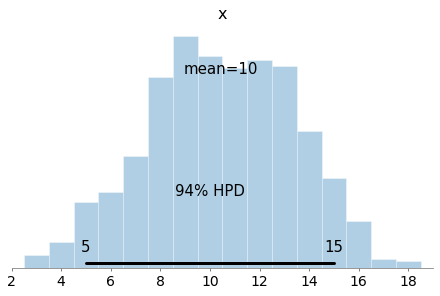

In [7]:
az.plot_posterior(trace_m_5_4['sum_3'], ec='w')
plt.xlim([2, 19])

In [8]:
np.zeros((3,6)).sum(0).shape

(6,)

## 5.5 Maxima

In [9]:
with pm.Model() as m_5_5:
    die = pm.DiscreteUniform('die', lower=1, upper=6, shape=(3,6))
    max_sum_3 = pm.Deterministic('max_sum_3', tt.max(tt.sum(die, axis=0)))
    trace_m_5_5 = pm.sample(10000)

Sequential sampling (2 chains in 1 job)
Metropolis: [die]
100%|██████████| 10500/10500 [00:01<00:00, 5690.10it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


(2, 19)

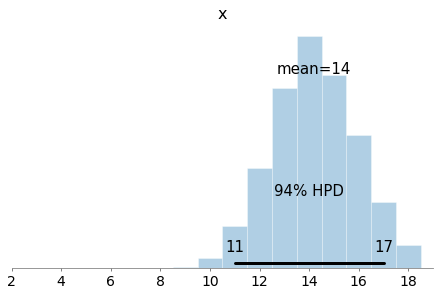

In [10]:
az.plot_posterior(trace_m_5_5['max_sum_3'], ec='w')
plt.xlim([2, 19])

In [11]:
np.mean(trace_m_5_5['max_sum_3'] >= 18)

0.02395

## 5.6 Mixtures

Sequential sampling (2 chains in 1 job)
Metropolis: [roll]
100%|██████████| 10500/10500 [00:01<00:00, 5632.88it/s]
The number of effective samples is smaller than 10% for some parameters.


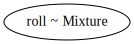

In [12]:
with pm.Model() as m_5_6:
    upper = np.array([4,6,8,12,20])
    dice = pm.DiscreteUniform.dist(lower=1, upper=upper)
    
    weights = np.ones(len(upper))/len(upper)
    roll = pm.Mixture('roll', comp_dists=dice, w=weights, testval=5, dtype='int64') # testval and dtype are needed to avoid critical bugs in Mixture sampling

    trace_m_5_6 = pm.sample(10000)
pm.model_to_graphviz(m_5_6)

(0, 25)

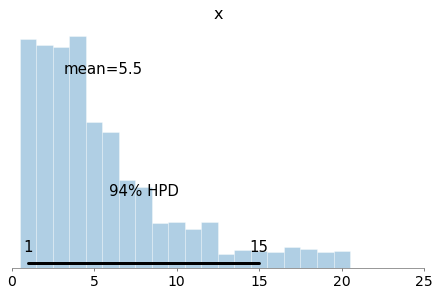

In [13]:
az.plot_posterior(trace_m_5_6['roll'], ec='w')
plt.xlim([0,25])